### EDA of titanic use case data

**Objective**: Have a better understanding of data distributions and relations

**Results**: 


In [1]:

import pandas as pd             # data analysis
import numpy as np              # numerical tools
import matplotlib.pyplot as plt # plotting tools
import seaborn as sns           # better looking plots

sns.set(style = 'whitegrid')

In [2]:
RAW_PATH = "../../data/raw/"

In [3]:
train = pd.read_csv(os.path.join(RAW_PATH, "train.csv"))
test  = pd.read_csv(os.path.join(RAW_PATH, "train.csv")) 

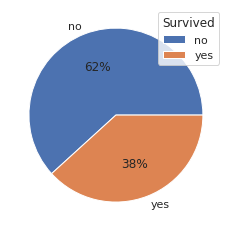

In [4]:
# Survived share

labels = ["no", "yes"]
ax = plt.pie(train[['PassengerId', 'Survived']].groupby('Survived', as_index=False).sum()['PassengerId'], labels=labels, autopct = '%0.0f%%')
ax = plt.legend(title = "Survived")

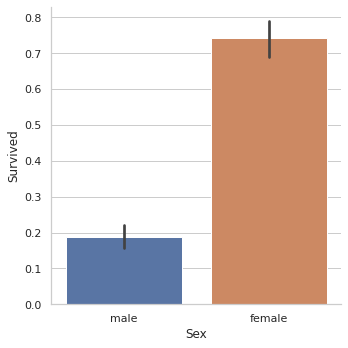

In [6]:
# Survival rate by sex

sns.catplot(y="Survived", x="Sex", kind="bar", data=train)

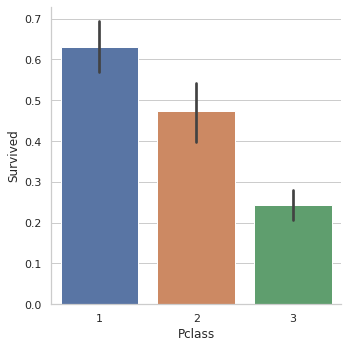

In [7]:
# Survival rate by class

sns.catplot(y="Survived", x="Pclass", kind='bar', data=train)